In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris(as_frame=True)
df = iris.frame 
print("🔹 Full Dataset Shape:", df.shape)
print("\n🔹 First 5 rows of the dataset:")
print(df.head())

🔹 Full Dataset Shape: (150, 5)

🔹 First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [3]:
print("\n🔹 Dataset Info:")
print(df.info())
print("\n🔹 Target Classes:", iris.target_names)



🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None

🔹 Target Classes: ['setosa' 'versicolor' 'virginica']


In [4]:
print("\n🔹 Class distribution (Full dataset):")
print(df['target'].value_counts())


🔹 Class distribution (Full dataset):
target
0    50
1    50
2    50
Name: count, dtype: int64


In [5]:
train_data, temp_data = train_test_split(
    df, test_size=0.30, random_state=42, stratify=df['target']
)

In [6]:
val_data, test_data = train_test_split(
    temp_data, test_size=0.50, random_state=42, stratify=temp_data['target']
)

In [7]:
print("\n✅ Split Done Successfully!")
print("Train shape:", train_data.shape)
print("Validation shape:", val_data.shape)
print("Test shape:", test_data.shape)


✅ Split Done Successfully!
Train shape: (105, 5)
Validation shape: (22, 5)
Test shape: (23, 5)


In [8]:
print("\n🔹 Train Class Distribution:")
print(train_data['target'].value_counts())

print("\n🔹 Validation Class Distribution:")
print(val_data['target'].value_counts())

print("\n🔹 Test Class Distribution:")
print(test_data['target'].value_counts())


🔹 Train Class Distribution:
target
1    35
0    35
2    35
Name: count, dtype: int64

🔹 Validation Class Distribution:
target
0    8
1    7
2    7
Name: count, dtype: int64

🔹 Test Class Distribution:
target
2    8
1    8
0    7
Name: count, dtype: int64


In [ ]:
#train_data.to_csv("iris_train.csv", index=False)
#val_data.to_csv("iris_validation.csv", index=False)
#test_data.to_csv("iris_test.csv", index=False)

#print("\n📂 Files saved as: iris_train.csv, iris_validation.csv, iris_test.csv")

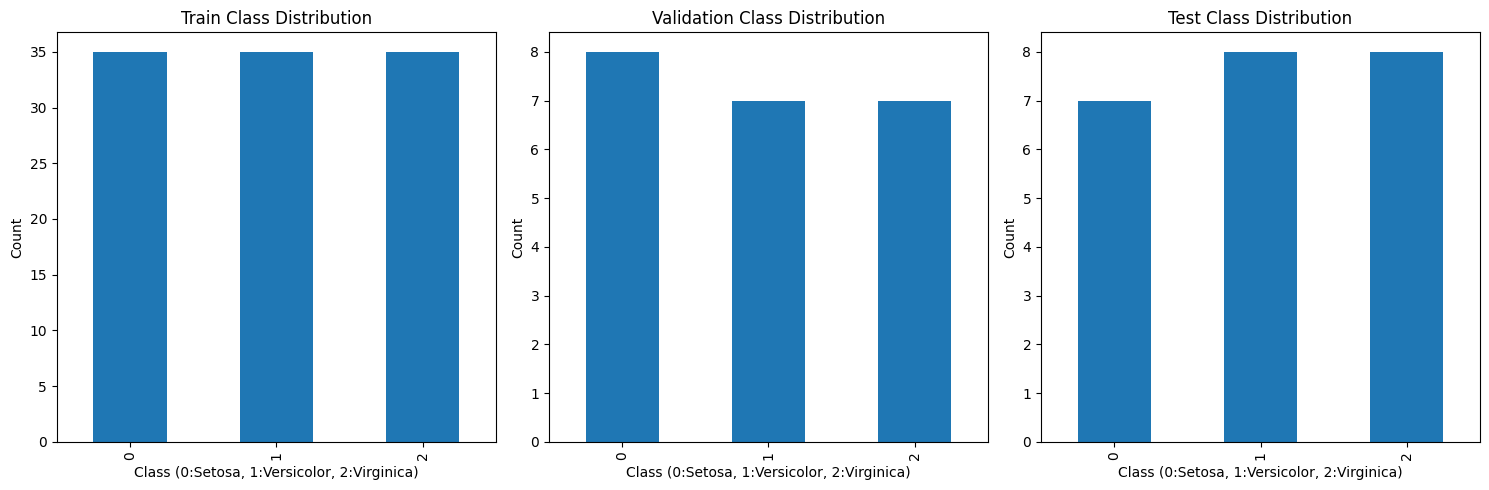

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Train
train_data['target'].value_counts().sort_index().plot(
    kind='bar', ax=axes[0], title="Train Class Distribution"
)

# Validation
val_data['target'].value_counts().sort_index().plot(
    kind='bar', ax=axes[1], title="Validation Class Distribution"
)

# Test
test_data['target'].value_counts().sort_index().plot(
    kind='bar', ax=axes[2], title="Test Class Distribution"
)

# Add labels
for ax in axes:
    ax.set_xlabel("Class (0:Setosa, 1:Versicolor, 2:Virginica)")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()